# Initialize Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import uproot
import os
import sys
import tqdm
import pandas as pd
import pickle as pkl
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as pe

# %matplotlib qt
%matplotlib inline

In [2]:
sys.path.append('../python/')
from filterMethods import *
from hitAccuracyMethods import *
from statisticsMethods import *
from importMethods import *
from constants import *
import plotParameters

In [3]:
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Load Data

In [4]:
fileName = '/Users/noah-everett/Documents_non-iCloud/dsps/runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL_+-1.00randPosNoSteps_randDir_v0.root'

histDir = '/photoSensor_hits_histograms'

print(get_histogram_names    (fileName, histDir))
print(get_histogram_titles   (fileName, histDir))
print(get_histogram_positions(fileName, histDir))
print(get_histogram_walls    (fileName, histDir))

['photoSensor_0;1', 'photoSensor_1;1', 'photoSensor_2;1', 'photoSensor_3;1', 'photoSensor_4;1', 'photoSensor_5;1', 'photoSensor_6;1', 'photoSensor_7;1', 'photoSensor_8;1', 'photoSensor_9;1', 'photoSensor_10;1', 'photoSensor_11;1', 'photoSensor_12;1', 'photoSensor_13;1', 'photoSensor_14;1', 'photoSensor_15;1', 'photoSensor_16;1', 'photoSensor_17;1', 'photoSensor_18;1', 'photoSensor_19;1', 'photoSensor_20;1', 'photoSensor_21;1', 'photoSensor_22;1', 'photoSensor_23;1', 'photoSensor_24;1', 'photoSensor_25;1', 'photoSensor_26;1', 'photoSensor_27;1', 'photoSensor_28;1', 'photoSensor_29;1', 'photoSensor_30;1', 'photoSensor_31;1', 'photoSensor_32;1', 'photoSensor_33;1', 'photoSensor_34;1', 'photoSensor_35;1', 'photoSensor_36;1', 'photoSensor_37;1', 'photoSensor_38;1', 'photoSensor_39;1', 'photoSensor_40;1', 'photoSensor_41;1', 'photoSensor_42;1', 'photoSensor_43;1', 'photoSensor_44;1', 'photoSensor_45;1', 'photoSensor_46;1', 'photoSensor_47;1', 'photoSensor_48;1', 'photoSensor_49;1', 'photoSen

In [5]:
treeName_photoSensor = 'photoSensor_hits;1'
treeName_lens        = 'lens_hits;1'
df_hits = pd.DataFrame(columns=['sensor_name', 'sensor_direction', 'sensor_position', 'relativePosition', 'relativePosition_binned', 'time'])
df_hits['sensor_name'                        ] = get_photosensor_hits_photosensor_ID              (fileName, treeName_photoSensor)
df_hits['sensor_direction'                   ] = get_photosensor_hits_photosensor_direction       (fileName, treeName_photoSensor)
df_hits['sensor_position'                    ] = get_photosensor_hits_photosensor_position        (fileName, treeName_photoSensor)
df_hits['sensor_wall'                        ] = get_photosensor_hits_photosensor_wall            (fileName, treeName_photoSensor)
df_hits['relativePosition'                   ] = get_photosensor_hits_position_relative           (fileName, treeName_photoSensor)
df_hits['relativePosition'                   ] = fixRotations_relative_signs(
    np.array(df_hits['relativePosition'].to_list()), 
    np.array(df_hits['sensor_wall'     ].to_list()),
    handleZ=False
)
df_hits['relativePosition_binned'            ] = get_photosensor_hits_position_relative_binned    (fileName, treeName_photoSensor, histDir,
                                                                                                   x=np.array(df_hits['relativePosition'].to_list())[:,0],
                                                                                                   y=np.array(df_hits['relativePosition'].to_list())[:,1])
df_hits['relativePosition_nBin'              ] = get_photosensor_hits_position_relative_nBin      (fileName, treeName_photoSensor, histDir)
df_hits['absolutePosition'                   ] = get_photosensor_hits_position_absolute           (fileName, treeName_photoSensor)
df_hits['initialPosition'                    ] = get_photosensor_hits_position_initial            (fileName, treeName_photoSensor)
df_hits['time'                               ] = get_photosensor_hits_time                        (fileName, treeName_photoSensor)


df_hits['direction_relative'                 ] = get_photosensor_hits_direction_relative     (fileName, treeName_photoSensor)
df_hits['direction_relative_lens_0'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 0)
df_hits['position_relative_lens_0'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 0)
df_hits['direction_relative_lens_1'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 1)
df_hits['position_relative_lens_1'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 1)

df_hits['direction_relative'                 ] = fixRotations_relative_signs(np.array(df_hits['direction_relative'       ].to_list()), np.array(df_hits['sensor_wall'].to_list()), handleZ=False)
df_hits['direction_relative_lens_0'          ] = fixRotations_relative_signs(np.array(df_hits['direction_relative_lens_0'].to_list()), np.array(df_hits['sensor_wall'].to_list()), handleZ=False)
df_hits['position_relative_lens_0'           ] = fixRotations_relative_signs(np.array(df_hits['position_relative_lens_0' ].to_list()), np.array(df_hits['sensor_wall'].to_list()), handleZ=False)
df_hits['direction_relative_lens_1'          ] = fixRotations_relative_signs(np.array(df_hits['direction_relative_lens_1'].to_list()), np.array(df_hits['sensor_wall'].to_list()), handleZ=False)
df_hits['position_relative_lens_1'           ] = fixRotations_relative_signs(np.array(df_hits['position_relative_lens_1' ].to_list()), np.array(df_hits['sensor_wall'].to_list()), handleZ=False)

df_hits = df_hits[df_hits['direction_relative_lens_0'] != (0, 0, 0)]
df_hits = df_hits[df_hits['direction_relative_lens_1'] != (0, 0, 0)]
df_hits = df_hits[df_hits['position_relative_lens_0' ] != (0, 0, 0)]
df_hits = df_hits[df_hits['position_relative_lens_1' ] != (0, 0, 0)]

df_hits['direction_relative_lens_0_theta'    ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
df_hits['direction_relative_lens_0_phi'      ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_lens_0_phi'       ] = df_hits['position_relative_lens_0' ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['direction_relative_lens_1_theta'    ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
df_hits['direction_relative_lens_1_phi'      ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_lens_1_phi'       ] = df_hits['position_relative_lens_1' ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['direction_relative_phi'             ] = df_hits['direction_relative'       ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_phi'              ] = df_hits['relativePosition'         ].apply(lambda x: np.arctan2(x[1], x[0]))

def boundAngle(angle):
    angle[angle > np.pi] -= 2*np.pi
    angle[angle < -np.pi] += 2*np.pi

    return angle

df_hits['theta_error'] = df_hits['direction_relative_lens_0_theta'] - df_hits['direction_relative_lens_1_theta']
df_hits['phi_error'  ] = df_hits['direction_relative_lens_0_phi'  ] - df_hits['direction_relative_lens_1_phi'  ]
df_hits['phi_error'  ] = boundAngle(df_hits['phi_error']).to_list()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1200809427.py:40: RuntimeWarning: invalid value encountered in scalar divide
  df_hits['direction_relative_lens_0_theta'    ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1200809427.py:43: RuntimeWarning: invalid value encountered in scalar divide
  df_hits['direction_relative_lens_1_theta'    ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1200809427.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle[angle > np.pi] -= 2*np.pi
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1200809427.py:51: Setting

# Filter Hits

In [6]:
search_radius = 0
search_number = 0

df_hits = filter_hits(df_hits, radius=search_radius, number=search_number)

# Reconstruct Hit Angle

In [7]:
# a0 = np.array(df_hits['absolutePosition'].to_list())[:, 0]
# a1 = np.array(df_hits['absolutePosition'].to_list())[:, 1]
# s0 = np.array(df_hits['sensor_position' ].to_list())[:, 0]
# s1 = np.array(df_hits['sensor_position' ].to_list())[:, 1]
# r0 = a0 - s0
# r1 = a1 - s1
r0 = None
r1 = None

binned = True

def rToTheta(r):
    return r/(CM_PER_RAD*MM_PER_CM)
df_hits = make_r(df_hits, x=r0, y=r1)
df_hits = make_theta(df_hits, rToTheta, binned=binned)
df_hits = make_phi(df_hits, binned=binned, x=r0, y=r1)

# df_hits['phi'], df_hits['theta'] = changePhiSignWithTheta(df_hits['phi'], df_hits['theta'])
# df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_lens_0_theta'] = changePhiSignWithTheta(df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_lens_0_theta'])

df_hits = filter_r(df_hits, Y_LIM)

df_hits = make_relativeVector(df_hits)

# Data Visualization

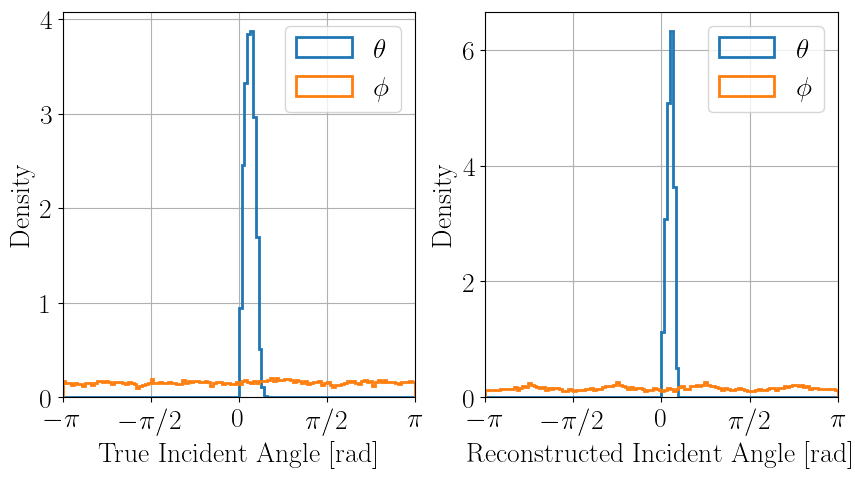

In [8]:
nBins = 125
lw = 2
density = True

bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density)
ax[0].hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density)
ax[0].legend()
ax[0].set_xlabel('True Incident Angle [rad]')
ax[0].set_ylabel('Density' if density else 'Counts')
ax[0].set_xlim(-np.pi, np.pi)
# [0]ax.set_xlim(0, np.pi/6)
ax[0].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax.set_title('Lens 0')jA
ax[0].grid()

ax[1].hist(df_hits['theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density)
ax[1].hist(df_hits['phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density)
ax[1].legend()
ax[1].set_xlabel('Reconstructed Incident Angle [rad]')
ax[1].set_ylabel('Density' if density else 'Counts')
ax[1].set_xlim(-np.pi, np.pi)
# [1]ax.set_xlim(0, np.pi/6)
ax[1].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax.set_title('Lens 1')
ax[1].grid()

fig.savefig('../figures/trueIncidentAngleLens0.pdf', bbox_inches='tight')
plt.show()

# Reconstruction Performance

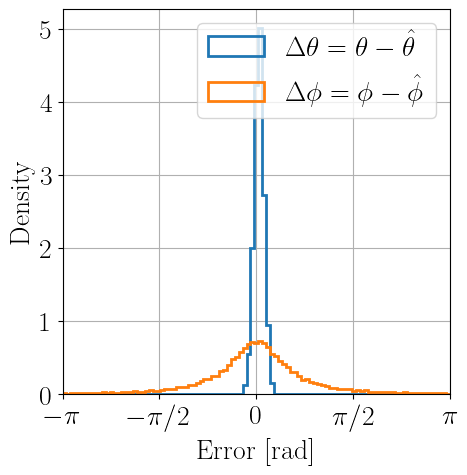

In [9]:
nBins = 100
lw = 2

density = True
cumulative = False
abs = False

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]
# error_phi_1   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]
# error_phi_2   = boundAngle(df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ] + np.pi)
# error_phi_12 = np.array([error_phi_1, error_phi_2]).T.reshape(error_phi_1.shape[0], 2)
# error_phi = error_phi_12[np.argmin(np.abs(error_phi_12), axis=0), np.arange(len(error_phi_12[0]))]

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(error_theta, bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\theta}=\abs{\theta-\hat{\theta}}$' if abs else r'$\Delta\theta=\theta-\hat{\theta}$',
        density=density, cumulative=cumulative)
ax.hist(error_phi  , bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\phi}=\abs{\phi-\hat{\phi}}$' if abs else r'$\Delta\phi=\phi-\hat{\phi}$',
        density=density, cumulative=cumulative)
ax.legend()
ax.set_xlabel('Error [rad]')
ax.set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax.set_xticks(np.linspace(0, np.pi, 3))
    ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(0, np.pi)
else:
    ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(-np.pi, np.pi)

ax.grid()

plt.savefig('../figures/theta_phi_error.pdf', bbox_inches='tight')
plt.show()

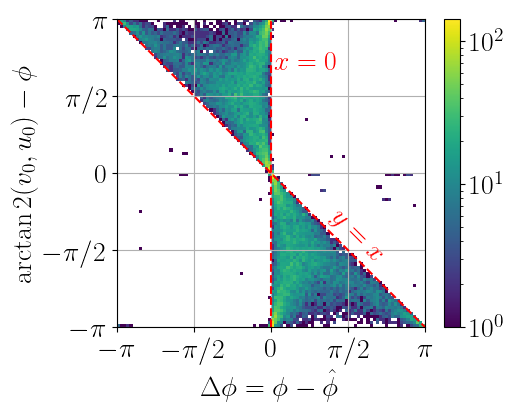

In [10]:
error_phi  = df_hits['direction_relative_lens_0_phi'] - df_hits['phi']
posDir_phi = df_hits['position_relative_lens_0_phi' ] - df_hits['direction_relative_lens_0_phi']

error_phi  = boundAngle(error_phi)
posDir_phi = boundAngle(posDir_phi)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# ax.scatter(error_phi, posDir_phi, s=3)
hist = ax.hist2d(error_phi, posDir_phi, bins=100, norm=LogNorm())
ax.plot([-np.pi, np.pi], [np.pi, -np.pi], ls='--', c='r')
ax.plot([0,0], [-np.pi, np.pi], ls='--', c='r')
ax.set_xlabel(r'$\Delta\phi=\phi-\hat{\phi}$')
ax.set_ylabel(r'$\arctan2(v_0,u_0)-\phi$')
# ax.set_xlim(-np.pi, np.pi)
ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_yticks(np.linspace(-np.pi, np.pi, 5))
ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.grid()
ax.set_aspect('equal')
cbar = plt.colorbar(hist[3], ax=ax)

ax.text(0.51, 0.9, r'$x=0$', transform=ax.transAxes, ha='left', va='top', color='r', rotation=0)
ax.text(0.68, 0.4, r'$y=x$', transform=ax.transAxes, ha='left', va='top', color='r', rotation=-45)

plt.show()

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(df_hits['direction_relative_lens_0_phi'], df_hits['position_relative_phi'], s=3)
ax[0].set_xlabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax[0].set_ylabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[0].grid()

ax[1].scatter(df_hits['position_relative_lens_0_phi'], df_hits['position_relative_phi'], s=3)
ax[1].set_xlabel(r'$\phi_{\text{pos}}^{\text{lens}}$')
ax[1].set_ylabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[1].grid()

fig.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/2079197602.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


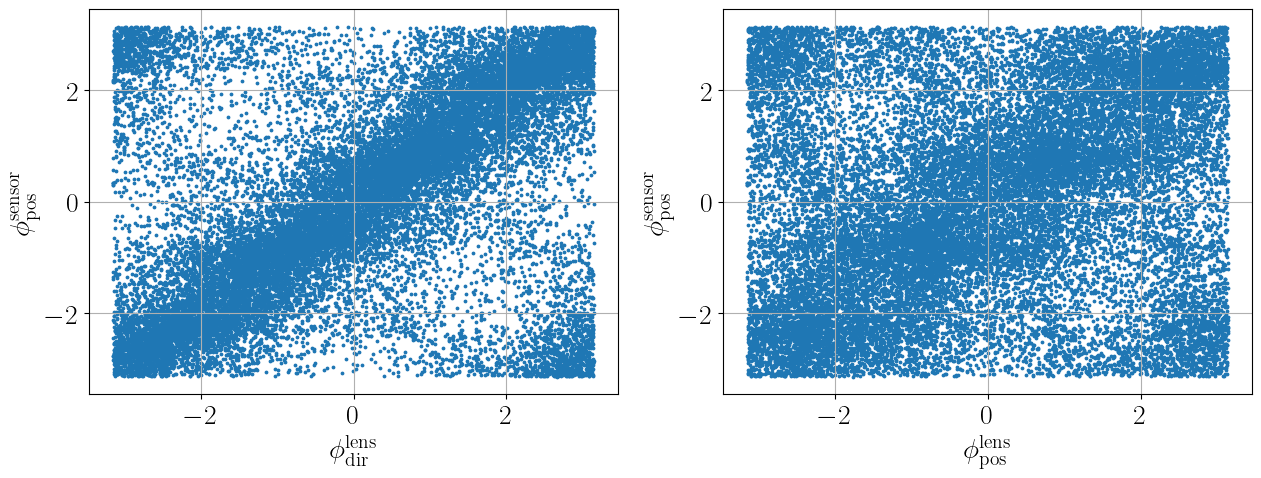

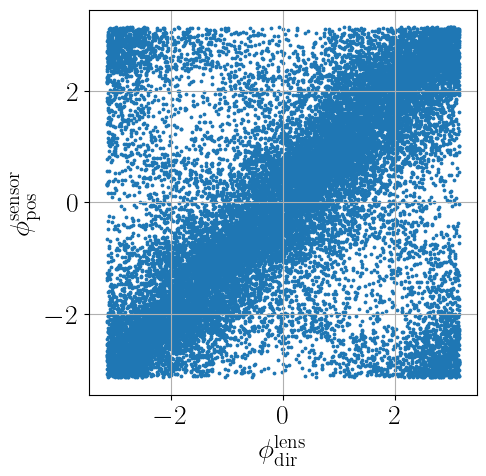

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(df_hits['direction_relative_lens_0_phi'], df_hits['position_relative_phi'], s=3)
ax.set_xlabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax.set_ylabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax.grid()
plt.show()

[[-0.16059369 -2.31955905 -1.48756799 ...  1.85095352  0.81167777
   1.22259866]
 [-0.16059369 -2.31955905 -1.48756799 ...  1.85095352  0.81167777
   1.22259866]]


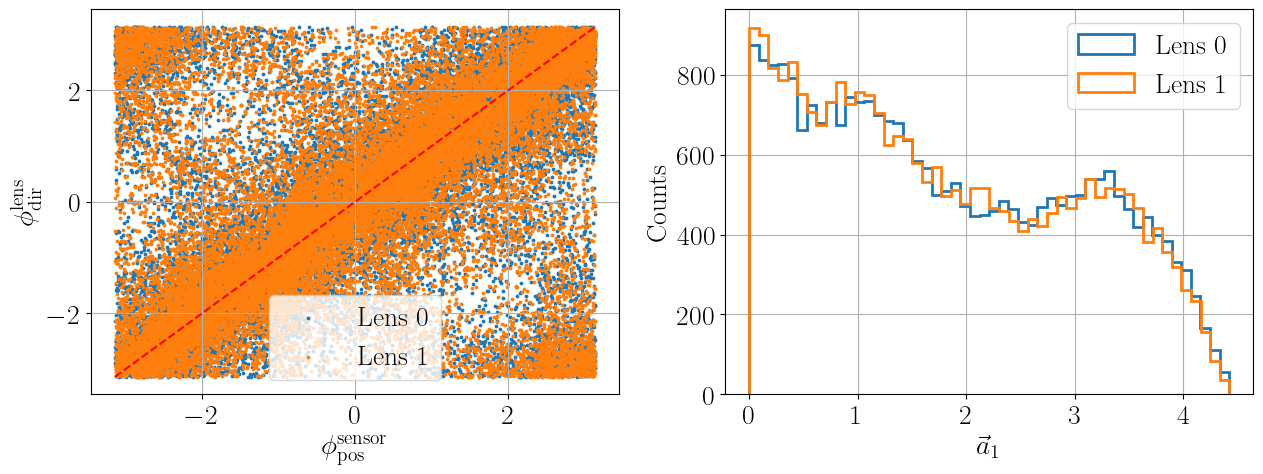

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_0_phi'], s=3, label='Lens 0')
ax[0].scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_1_phi'], s=3, label='Lens 1')
ax[0].plot([-np.pi, np.pi], [-np.pi, np.pi], ls='--', c='r')
ax[0].set_xlabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[0].set_ylabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax[0].legend()
ax[0].grid()
# plt.show()

x   = np.array(df_hits['position_relative_phi'].to_list())
y_0 = np.array(df_hits['direction_relative_lens_0_phi'].to_list())
y_1 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())

xy_0 = np.vstack([x, y_0])
xy_1 = np.vstack([x, y_1])

u = np.array([1, 1]) / np.linalg.norm([1, 1])

a1_0 = np.dot(u, xy_0)
a1_1 = np.dot(u, xy_1)

a1_0 = a1_0 * u[:, np.newaxis]
a1_1 = a1_1 * u[:, np.newaxis]

print(a1_0)

a2_0 = xy_0 - a1_0
a2_1 = xy_1 - a1_1

# for a1, a2 in zip(a1_0.T, a2_0.T):
#     print(np.dot(a1, a2))

ax[1].hist(np.linalg.norm(a1_0, axis=0), bins=50, histtype='step', label='Lens 0', lw=lw)
ax[1].hist(np.linalg.norm(a1_1, axis=0), bins=50, histtype='step', label='Lens 1', lw=lw)
ax[1].legend()
ax[1].set_xlabel(r'$\vec{a}_1$')
ax[1].set_ylabel('Counts')
ax[1].grid()
plt.show()

[[-0.16059369 -2.31955905 -1.48756799 ...  1.85095352  0.81167777
   1.22259866]
 [-0.16059369 -2.31955905 -1.48756799 ...  1.85095352  0.81167777
   1.22259866]]


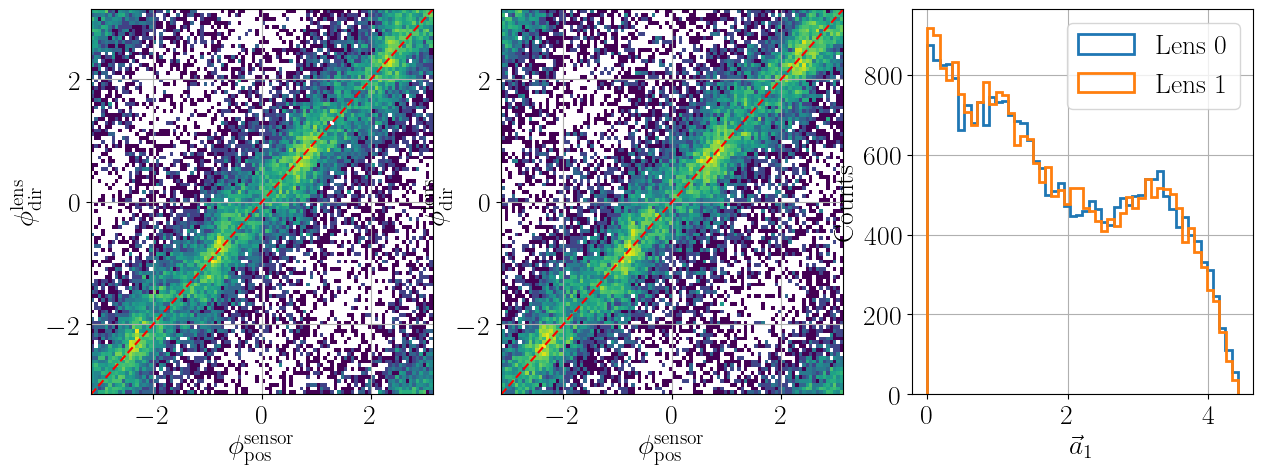

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax.scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_0_phi'], s=3, label='Lens 0')
# ax.scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_1_phi'], s=3, label='Lens 1')
ax[0].hist2d(df_hits['position_relative_phi'], df_hits['direction_relative_lens_0_phi'], bins=100, norm=LogNorm(), label='Lens 0')
ax[0].plot([-np.pi, np.pi], [-np.pi, np.pi], ls='--', c='r')
ax[0].set_xlabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[0].set_ylabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
# ax[0].legend()
ax[0].grid()
# plt.show()

ax[1].hist2d(df_hits['position_relative_phi'], df_hits['direction_relative_lens_1_phi'], bins=100, norm=LogNorm(), label='Lens 1')
ax[1].plot([-np.pi, np.pi], [-np.pi, np.pi], ls='--', c='r')
ax[1].set_xlabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[1].set_ylabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax[1].grid()

x   = np.array(df_hits['position_relative_phi'].to_list())
y_0 = np.array(df_hits['direction_relative_lens_0_phi'].to_list())
y_1 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())

xy_0 = np.vstack([x, y_0])
xy_1 = np.vstack([x, y_1])

u = np.array([1, 1]) / np.linalg.norm([1, 1])

a1_0 = np.dot(u, xy_0)
a1_1 = np.dot(u, xy_1)

a1_0 = a1_0 * u[:, np.newaxis]
a1_1 = a1_1 * u[:, np.newaxis]

print(a1_0)

a2_0 = xy_0 - a1_0
a2_1 = xy_1 - a1_1

# for a1, a2 in zip(a1_0.T, a2_0.T):
#     print(np.dot(a1, a2))

ax[2].hist(np.linalg.norm(a1_0, axis=0), bins=50, histtype='step', label='Lens 0', lw=lw)
ax[2].hist(np.linalg.norm(a1_1, axis=0), bins=50, histtype='step', label='Lens 1', lw=lw)
ax[2].legend()
ax[2].set_xlabel(r'$\vec{a}_1$')
ax[2].set_ylabel('Counts')
ax[2].grid()
plt.show()

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(6,6), gridspec_kw={'height_ratios': [1, 3], 'width_ratios': [3, 1]})

sigma = np.pi/4
Delta = 0.25
xMax = np.pi + Delta
xMin = -np.pi - Delta
yMax = np.pi + Delta
yMin = -np.pi - Delta

nBins = 50

color = 'teal'
lw = 2

sigma_prime = sigma/np.sqrt(2)

ax[0,1].clear()
ax[0,1].set_axis_off()

ax[0,1].scatter([],[], s=40, marker='o', color='r', label=r'$\phi_A=\phi\in\gamma_i$, \hspace{3mm} $\phi_B=\phi\in\gamma_{01}$')
ax[0,1].scatter([],[], s=40, marker='s', color='b', label=r'$\phi_A=\phi\in\gamma_{01}$, \hspace{0mm} $\phi_B=\phi\in\gamma_t$')
ax[0,1].scatter([],[], s=40, marker='*', color='g', label=r'$\phi_A=\phi\in\gamma_i$, \hspace{3mm} $\phi_B=\phi\in\gamma_t$'   )

ax[1,0].scatter(df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_lens_1_phi'], s=4.5, marker='o', color='r', alpha=1)
ax[1,0].scatter(df_hits['direction_relative_lens_1_phi'], df_hits['direction_relative_phi'       ], s=4.5, marker='s', color='b', alpha=1)
ax[1,0].scatter(df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_phi'       ], s=4.5, marker='*', color='g', alpha=1)

ax[1,0].plot([-np.pi, np.pi], [-np.pi, np.pi], 'k--', lw=lw)
ax[1,0].plot([-np.pi-sigma_prime, np.pi-sigma_prime], [-np.pi+sigma_prime, np.pi+sigma_prime], color=color, lw=lw, linestyle='--')
ax[1,0].plot([-np.pi+sigma_prime, np.pi+sigma_prime], [-np.pi-sigma_prime, np.pi-sigma_prime], color=color, lw=lw, linestyle='--')
ax[1,0].fill_between([xMin, xMax], [yMax, yMax], [xMin+2*sigma_prime, xMax+2*sigma_prime], facecolor='white', alpha=0.5, hatch=r'xx', edgecolor=color)
ax[1,0].fill_between([xMin, xMax], [yMin, yMin], [xMin-2*sigma_prime, xMax-2*sigma_prime], facecolor='white', alpha=0.5, hatch=r'xx', edgecolor=color)

hist_1_i, bins_1_i = np.histogram(df_hits['direction_relative_lens_0_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_1_01, bins_1_01 = np.histogram(df_hits['direction_relative_lens_1_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_1_t, bins_1_t = np.histogram(df_hits['direction_relative_phi'], bins=np.linspace(-np.pi, np.pi, nBins))

ax[0,0].plot(bins_1_i[:-1], hist_1_i, color='r', lw=lw, ls='-', drawstyle='steps-pre')
ax[0,0].plot(bins_1_01[:-1], hist_1_01, color='b', lw=lw, ls='-', drawstyle='steps-pre')
ax[0,0].plot(bins_1_t[:-1], hist_1_t, color='g', lw=lw, ls='-', drawstyle='steps-pre')

hist_2_i, bins_2_i = np.histogram(df_hits['direction_relative_lens_0_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_2_01, bins_2_01 = np.histogram(df_hits['direction_relative_lens_1_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_2_t, bins_2_t = np.histogram(df_hits['direction_relative_phi'], bins=np.linspace(-np.pi, np.pi, nBins))

ax[1,1].plot(hist_2_i, bins_2_i[:-1], color='r', lw=lw, ls='-', drawstyle='steps-pre')
ax[1,1].plot(hist_2_01, bins_2_01[:-1], color='b', lw=lw, ls='-', drawstyle='steps-pre')
ax[1,1].plot(hist_2_t, bins_2_t[:-1], color='g', lw=lw, ls='-', drawstyle='steps-pre')

ax[1,0].set_xlabel(r'$\phi_A$')
ax[1,0].set_ylabel(r'$\phi_B$')
ax[1,0].set_xlim(xMin, xMax)
ax[1,0].set_ylim(yMin, yMax)
ax[1,0].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[1,0].set_yticks(np.linspace(-np.pi, np.pi, 5))
ax[1,0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax[1,0].set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax[1,0].set_aspect('equal')

ax[0,0].set_xlabel(r'')
ax[0,0].set_ylabel(r'')
ax[0,0].set_xlim(xMin, xMax)
ax[0,0].set_ylim(ymin=-20)
ax[0,0].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[0,0].set_yticks(np.linspace(0, 30, 3))
# ax[0,0].set_yticks(np.linspace(-2, 2, 5))
ax[0,0].set_xticklabels(['']*5)
# ax[0,0].set_yticklabels(['']*5)
ax[0,0].grid()
ax[0,0].set_aspect((xMax-xMin)/(ax[0,0].get_ylim()[1]-ax[0,0].get_ylim()[0])/3)

ax[1,1].set_xlabel(r'')
ax[1,1].set_ylabel(r'')
ax[1,1].set_xlim(xmin=-5)
ax[1,1].set_ylim(yMin, yMax)
# ax[1,1].set_xticks(np.linspace(-2, 2, 5))
ax[1,1].set_xticks(np.linspace(0, 30, 3))
ax[1,1].set_yticks(np.linspace(-np.pi, np.pi, 5))
# ax[1,1].set_xticklabels(['']*5)
ax[1,1].set_yticklabels(['']*5)
ax[1,1].grid()
ax[1,1].set_aspect((ax[1,1].get_xlim()[1]-ax[1,1].get_xlim()[0])/(yMax-yMin)*3)

# ax[0,1].legend(loc='lower left', bbox_to_anchor=(0, 0))
ax[1,0].grid()

fig.tight_layout(h_pad=0, w_pad=0)

fig.savefig('../figures/dirPhi_translation.pdf', bbox_inches='tight')
fig.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/2523850383.py:90: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


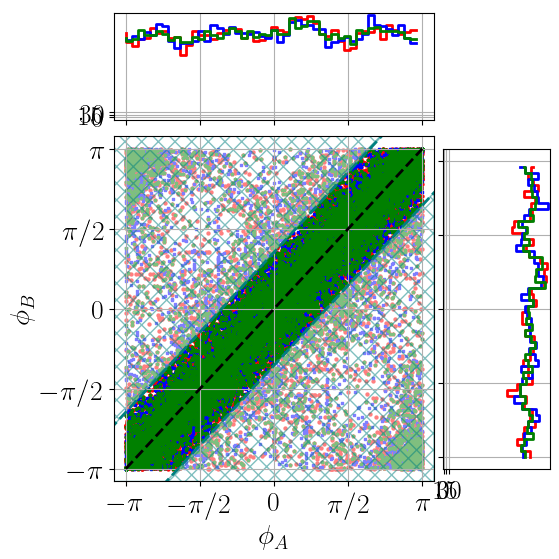

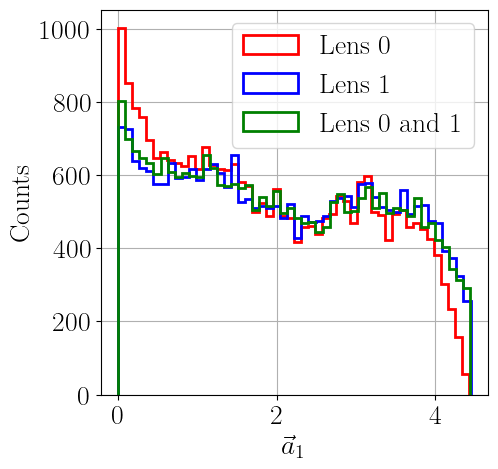

In [16]:
x0 = np.array(df_hits['direction_relative_lens_0_phi'].to_list())
x1 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())

y0 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())
y1 = np.array(df_hits['direction_relative_phi'       ].to_list())

x0y0 = np.vstack([x0, y0])
x1y1 = np.vstack([x1, y1])
x0y1 = np.vstack([x0, y1])

u = np.array([1, 1]) / np.linalg.norm([1, 1])

a1_00 = np.dot(u, x0y0)
a1_11 = np.dot(u, x1y1)
a1_01 = np.dot(u, x0y1)

a1_00 = a1_00 * u[:, np.newaxis]
a1_11 = a1_11 * u[:, np.newaxis]
a1_01 = a1_01 * u[:, np.newaxis]

a2_00 = x0y0 - a1_00
a2_11 = x1y1 - a1_11
a2_01 = x0y1 - a1_01

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(np.linalg.norm(a1_00, axis=0), bins=50, histtype='step', label='Lens 0'      , lw=lw, color='r')
ax.hist(np.linalg.norm(a1_11, axis=0), bins=50, histtype='step', label='Lens 1'      , lw=lw, color='b')
ax.hist(np.linalg.norm(a1_01, axis=0), bins=50, histtype='step', label='Lens 0 and 1', lw=lw, color='g')
ax.legend()
ax.set_xlabel(r'$\vec{a}_1$')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

scale = 1000
nBins = 100

absv = True
log = True
density = True

distBins = np.linspace(
    np.min(df_hits['relativeVector_r']), 
    np.max(df_hits['relativeVector_r']), 
    nBins
)

if absv:
    erroBins = np.linspace(0, np.pi, nBins//2)
    df_hits['theta_error_temp'] = df_hits['theta_error'].apply(lambda x: np.abs(x))
    df_hits['phi_error_temp']   = df_hits['phi_error'  ].apply(lambda x: np.abs(x))
else:
    erroBins = np.linspace(-np.pi, np.pi, nBins)
    df_hits['theta_error_temp'] = df_hits['theta_error']
    df_hits['phi_error_temp']   = df_hits['phi_error'  ]

df_hits['relativeVector_r_bin'] = pd.cut(df_hits['relativeVector_r'], bins=distBins, labels=False)
# mean_theta = (df_hits.groupby('relativeVector_r_bin')['theta_error_temp'].mean()/scale).to_numpy()
# mean_phi   = (df_hits.groupby('relativeVector_r_bin')['phi_error_temp'  ].mean()/scale).to_numpy()

mean_theta = np.zeros(len(distBins)-1)
mean_phi   = np.zeros(len(distBins)-1)

for i in range(len(distBins)-1):
    mean_theta[i] = df_hits[(df_hits['relativeVector_r'] > distBins[i]) & (df_hits['relativeVector_r'] < distBins[i+1])]['theta_error_temp'].mean()
    mean_phi[i]   = df_hits[(df_hits['relativeVector_r'] > distBins[i]) & (df_hits['relativeVector_r'] < distBins[i+1])]['phi_error_temp'  ].mean()

hist = ax[0].hist2d(df_hits['relativeVector_r']/scale, df_hits['theta_error_temp'], bins=(distBins/scale, erroBins), norm=(LogNorm() if log else None), density=density)
ax[0].plot(distBins[:-1]/scale, mean_theta, c='r', lw=2, drawstyle='steps-mid')
ax[0].set_xlabel(r'$\norm{\boldsymbol{p}-\boldsymbol{s}}$ [m]')
ax[0].set_ylabel(r'$\abs{\Delta\theta}=\abs{\theta-\hat{\theta}}$ [rad]')
ax[0].set_ylim(0, np.pi/6)
ax[0].set_yticks(np.linspace(0, np.pi, 5))
ax[0].set_yticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
ax[0].grid()
plt.colorbar(hist[3], ax=ax[0])

hist = ax[1].hist2d(df_hits['relativeVector_r']/scale, df_hits['phi_error_temp'], bins=(distBins/scale, erroBins), norm=(LogNorm() if log else None), density=density)
ax[1].plot(distBins[:-1]/scale, mean_phi, c='r', lw=2, drawstyle='steps-mid')
ax[1].set_xlabel(r'$\norm{\boldsymbol{p}-\boldsymbol{s}}$ [m]')
ax[1].set_ylabel(r'$\abs{\Delta\phi}=\abs{\phi-\hat{\phi}}$ [rad]')
ax[1].set_ylim(0, np.pi)
ax[1].set_yticks(np.linspace(0, np.pi, 5))
ax[1].set_yticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
ax[1].grid()
plt.colorbar(hist[3], ax=ax[1])

# fig.tight_layout(h_pad=0)
fig.tight_layout()
fig.savefig('../figures/theta_phi_error_vs_r.pdf', bbox_inches='tight')
fig.show()

df_hits = df_hits.drop(columns=['theta_error_temp', 'phi_error_temp', 'relativeVector_r_bin'])

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/2837347267.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


# Variance by Sensor

In [18]:
allHits = np.array(df_hits['relativePosition_binned'].to_list()).reshape(-1, 2)
allBins = np.array(df_hits['relativePosition_nBin'  ].to_list()).reshape(-1, 2)
xLimits = (int(np.min(allHits[:,0]))/10, int(np.max(allHits[:,0]))/10)
yLimits = (int(np.min(allHits[:,1]))/10, int(np.max(allHits[:,1]))/10)
xNbins  = (int(np.min(allBins[:,0])), int(np.max(allBins[:,0])))
yNbins  = (int(np.min(allBins[:,1])), int(np.max(allBins[:,1])))

error_theta_mean    = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_mean      = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_theta_sigma_1 = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_sigma_1   = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_theta_sigma_2 = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_sigma_2   = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_theta_sigma_3 = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_sigma_3   = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))

for ix in range(xNbins[0], xNbins[1]):
    for iy in range(yNbins[0], yNbins[1]):
        i_cur = np.array([ix, iy])
        i = np.where(np.all(allBins == i_cur, axis=1))[0]
        if len(i) == 0:
            continue
        thetas = df_hits['theta_error' ][i]
        phis   = df_hits['phi_error'   ][i]

        thetas = np.abs(thetas)
        phis   = np.abs(phis  )

        error_theta_mean[ix, iy] = np.mean(thetas)
        error_phi_mean  [ix, iy] = np.mean(phis)
        error_theta_sigma_1[ix, iy] = np.percentile(thetas, 68)
        error_phi_sigma_1  [ix, iy] = np.percentile(phis, 68)
        error_theta_sigma_2[ix, iy] = np.percentile(thetas, 95)
        error_phi_sigma_2  [ix, iy] = np.percentile(phis, 95)
        error_theta_sigma_3[ix, iy] = np.percentile(thetas, 99)
        error_phi_sigma_3  [ix, iy] = np.percentile(phis, 99)


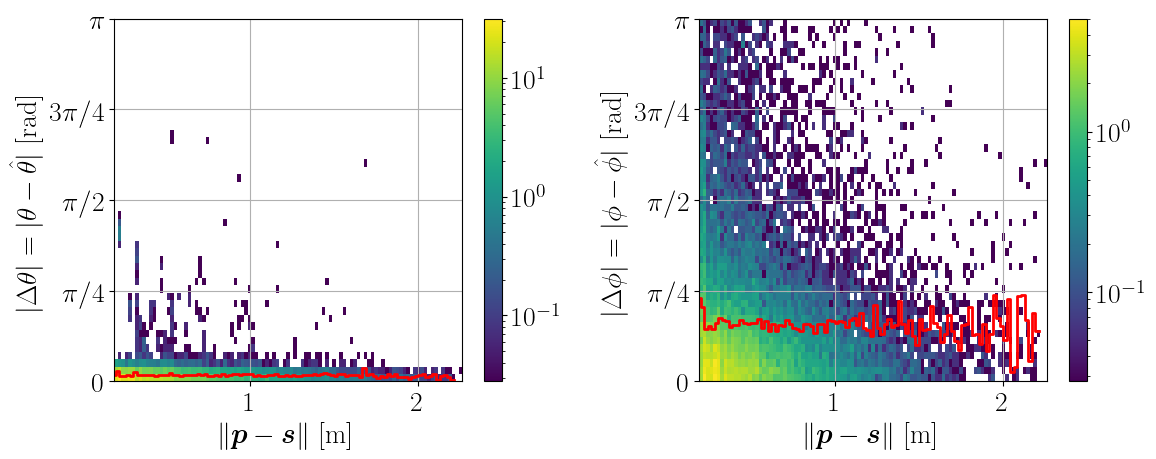

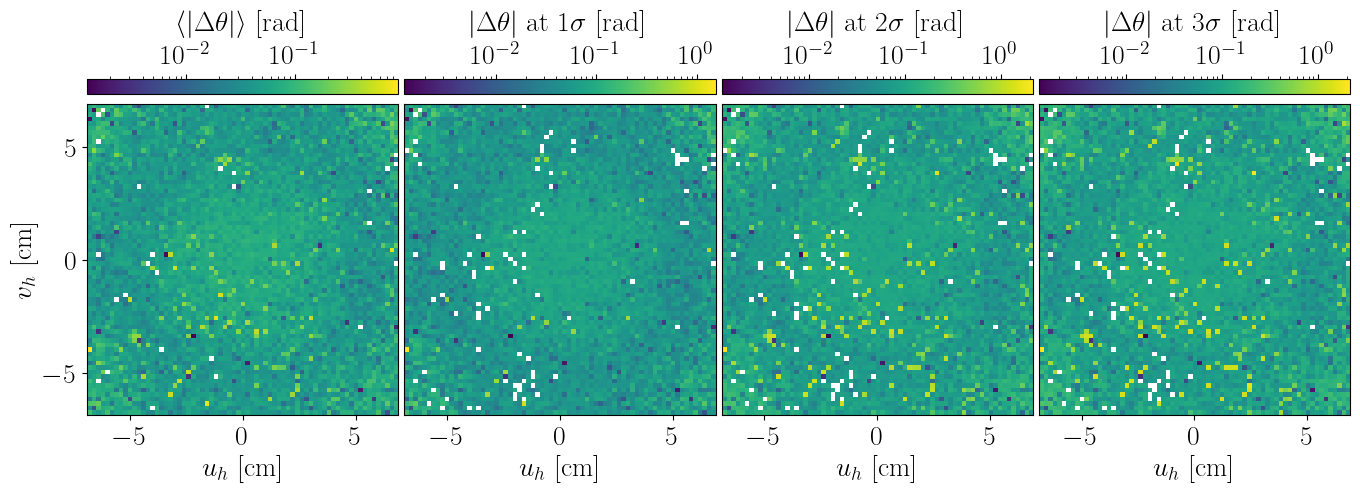

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(14, 5))

im0 = ax[0].imshow(error_theta_mean   , origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())
im1 = ax[1].imshow(error_theta_sigma_1, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())
im2 = ax[2].imshow(error_theta_sigma_2, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())
im3 = ax[3].imshow(error_theta_sigma_3, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
ax[3].set_aspect('equal')

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])

divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[2])
divider3 = make_axes_locatable(ax[3])

cax0 = divider0.append_axes("top", size="5%", pad=0.1)
cax1 = divider1.append_axes("top", size="5%", pad=0.1)
cax2 = divider2.append_axes("top", size="5%", pad=0.1)
cax3 = divider3.append_axes("top", size="5%", pad=0.1)

cbar0 = fig.colorbar(im0, cax=cax0, orientation='horizontal')
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cbar3 = fig.colorbar(im3, cax=cax3, orientation='horizontal')

cbar0.ax.xaxis.set_ticks_position('top')
cbar1.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar3.ax.xaxis.set_ticks_position('top')

cbar0.set_label(r'$\langle\abs{\Delta\theta}\rangle$ [rad]', labelpad=10)
cbar1.set_label(r'$\abs{\Delta\theta}$ at $1\sigma$ [rad]' , labelpad=10)
cbar2.set_label(r'$\abs{\Delta\theta}$ at $2\sigma$ [rad]' , labelpad=10)
cbar3.set_label(r'$\abs{\Delta\theta}$ at $3\sigma$ [rad]' , labelpad=10)

cbar0.ax.xaxis.set_label_position('top')
cbar1.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_label_position('top')
cbar3.ax.xaxis.set_label_position('top')

ax[0].set_ylabel(r'$v_h$ [cm]')
for a in ax:
    a.set_xlabel(r'$u_h$ [cm]')

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
# ax[2].set_yscale('log')
# ax[3].set_yscale('log')

fig.tight_layout(h_pad=0., w_pad=0.1)

fig.savefig('../figures/relativePositionVsThetaStatistics.pdf', bbox_inches='tight')
plt.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/656968806.py:27: UserWarning: Adding colorbar to a different Figure <Figure size 1400x500 with 8 Axes> than <Figure size 1400x500 with 8 Axes> which fig.colorbar is called on.
  cbar0 = fig.colorbar(im0, cax=cax0, orientation='horizontal')
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/656968806.py:28: UserWarning: Adding colorbar to a different Figure <Figure size 1400x500 with 8 Axes> than <Figure size 1400x500 with 8 Axes> which fig.colorbar is called on.
  cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/656968806.py:29: UserWarning: Adding colorbar to a different Figure <Figure size 1400x500 with 8 Axes> than <Figure size 1400x500 with 8 Axes> which fig.colorbar is called on.
  cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/656968806.py:30: Use

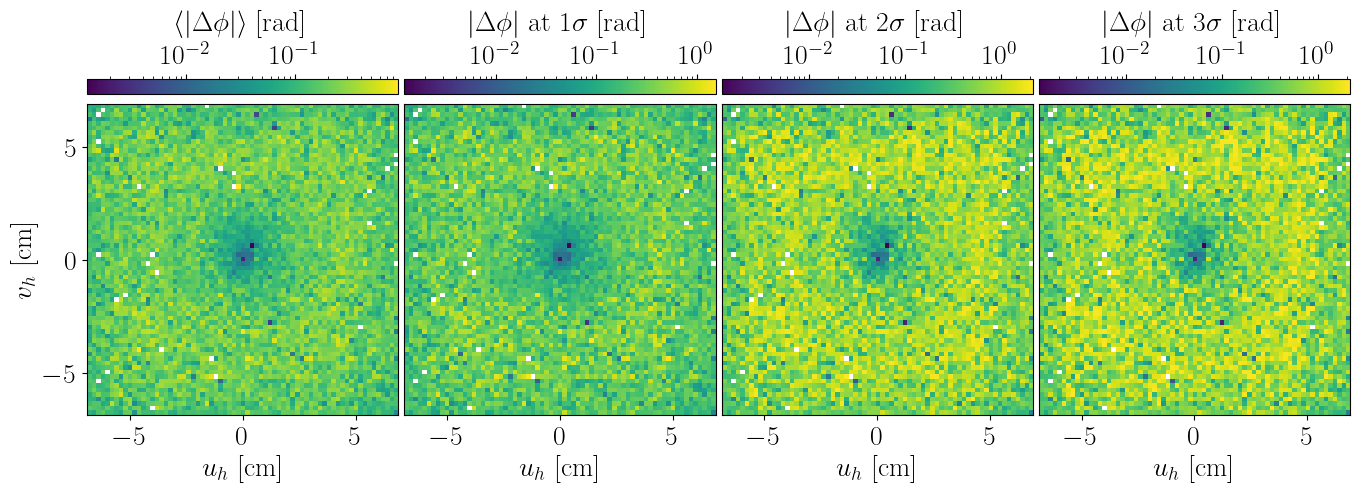

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(14, 5))

ax[0].imshow(error_phi_mean   , origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())
ax[1].imshow(error_phi_sigma_1, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())
ax[2].imshow(error_phi_sigma_2, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())
ax[3].imshow(error_phi_sigma_3, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis', norm=LogNorm())

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
ax[3].set_aspect('equal')

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])

divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[2])
divider3 = make_axes_locatable(ax[3])

cax0 = divider0.append_axes("top", size="5%", pad=0.1)
cax1 = divider1.append_axes("top", size="5%", pad=0.1)
cax2 = divider2.append_axes("top", size="5%", pad=0.1)
cax3 = divider3.append_axes("top", size="5%", pad=0.1)

cbar0 = fig.colorbar(im0, cax=cax0, orientation='horizontal')
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cbar3 = fig.colorbar(im3, cax=cax3, orientation='horizontal')

cbar0.ax.xaxis.set_ticks_position('top')
cbar1.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar3.ax.xaxis.set_ticks_position('top')

cbar0.set_label(r'$\langle\abs{\Delta\phi}\rangle$ [rad]', labelpad=10)
cbar1.set_label(r'$\abs{\Delta\phi}$ at $1\sigma$ [rad]' , labelpad=10)
cbar2.set_label(r'$\abs{\Delta\phi}$ at $2\sigma$ [rad]' , labelpad=10)
cbar3.set_label(r'$\abs{\Delta\phi}$ at $3\sigma$ [rad]' , labelpad=10)

cbar0.ax.xaxis.set_label_position('top')
cbar1.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_label_position('top')
cbar3.ax.xaxis.set_label_position('top')

ax[0].set_ylabel(r'$v_h$ [cm]')
for a in ax:
    a.set_xlabel(r'$u_h$ [cm]')

fig.tight_layout(h_pad=0., w_pad=0.1)

plt.savefig('../figures/relativePositionVsPhiStatistics.pdf', bbox_inches='tight')
plt.show()

# PDF-based Reconstruction

In [22]:
# pdfFileName = 'data/PDFs_allCalibrations_100.pkl'
pdfFileName = '/Users/noah-everett/Documents_non-iCloud/dsps/hitRecoPDFs/PDFs_only000.pkl'
# pdfFileName = 'data/PDFs_all1m.pkl'
# pdfFileName = 'data/PDFs_all.pkl'

# PDFs = pkl.load(open(pdfFileName, 'rb'))
# recoDirs = []
# for i,h in df_hits.iterrows():
#     positionBinned = h['relativePosition_binned']
#     ind = (int(positionBinned[0]), int(positionBinned[1]))
#     try:
#         PDF = PDFs[ind][0]
#         dirx = PDFs[ind][1]
#         diry = PDFs[ind][2]
#         PDF_flat = PDF.flatten()
#         PDF_flat /= np.sum(PDF_flat)
#         samples_ind = np.random.choice(np.arange(len(PDF_flat)), size=1000, p=PDF_flat)
#         samples_ind = np.unravel_index(samples_ind, PDF.shape)
#         samples_ind = np.array(samples_ind).T
#         samples_dir = np.array([
#             dirx[samples_ind[:,0], samples_ind[:,1]][0],
#             diry[samples_ind[:,0], samples_ind[:,1]][1]
#         ]).T
#         samples_dir = np.reshape(samples_dir, (-1, 2))
#         recoDir = np.mean(samples_dir, axis=0)
#         recoDir = np.reshape(recoDir,  -1)
#         recoDirs.append(recoDir)
#     except:
#         recoDirs.append([np.nan, np.nan])
#         # recoDirs.append(h['theta'], h['phi'])

# df_hits['theta_PDF'] = [d[0] for d in recoDirs]
# df_hits['phi_PDF'  ] = [d[1] for d in recoDirs]

df_hits = make_recoDir_num(df_hits, pdfFileName, method=np.mean)

100%|██████████| 26756/26756 [00:04<00:00, 5512.71it/s]


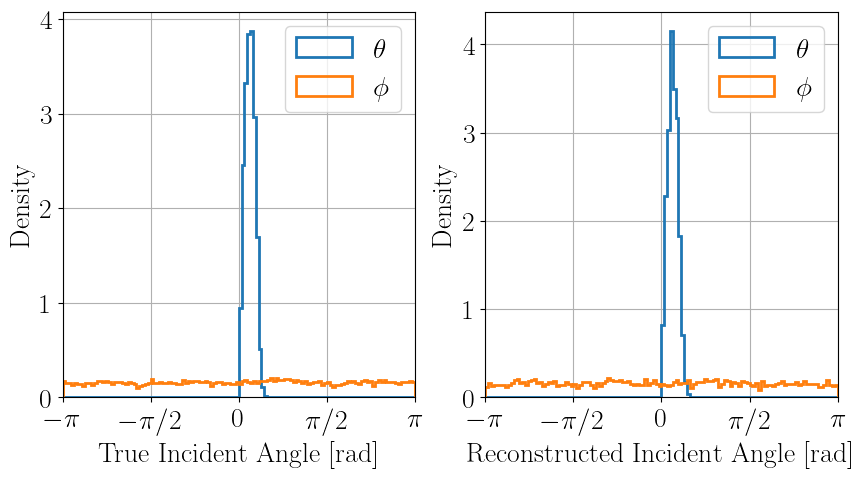

In [23]:
nBins = 125
lw = 2
density = True

bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density)
ax[0].hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density)
ax[0].legend()
ax[0].set_xlabel('True Incident Angle [rad]')
ax[0].set_ylabel('Density' if density else 'Counts')
ax[0].set_xlim(-np.pi, np.pi)
# [0]ax.set_xlim(0, np.pi/6)
ax[0].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax.set_title('Lens 0')jA
ax[0].grid()

ax[1].hist(df_hits['theta_num'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density)
ax[1].hist(df_hits['phi_num'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density)
ax[1].legend()
ax[1].set_xlabel('Reconstructed Incident Angle [rad]')
ax[1].set_ylabel('Density' if density else 'Counts')
ax[1].set_xlim(-np.pi, np.pi)
# [1]ax.set_xlim(0, np.pi/6)
ax[1].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax.set_title('Lens 1')
ax[1].grid()

fig.savefig('../figures/trueIncidentAngleLens0.pdf', bbox_inches='tight')
plt.show()

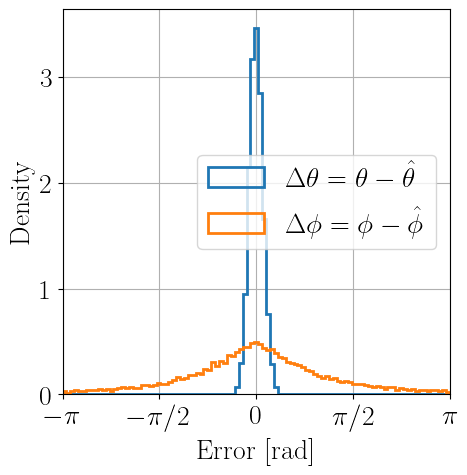

In [24]:
nBins = 100
lw = 2

density = True
cumulative = False
abs = False

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta_num']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi_num'  ]
# error_phi_1   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]
# error_phi_2   = boundAngle(df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ] + np.pi)
# error_phi_12 = np.array([error_phi_1, error_phi_2]).T.reshape(error_phi_1.shape[0], 2)
# error_phi = error_phi_12[np.argmin(np.abs(error_phi_12), axis=0), np.arange(len(error_phi_12[0]))]

twilight = cm.twilight(np.linspace(0,1,40))

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
hist_theta = ax.hist(error_theta, bins=bins, histtype='step', lw=lw, 
                     label=r'$\abs{\Delta\theta}=\abs{\theta-\hat{\theta}}$' if abs else r'$\Delta\theta=\theta-\hat{\theta}$',
                     density=density, cumulative=cumulative)
hist_phi = ax.hist(error_phi  , bins=bins, histtype='step', lw=lw, 
                   label=r'$\abs{\Delta\phi}=\abs{\phi-\hat{\phi}}$' if abs else r'$\Delta\phi=\phi-\hat{\phi}$',
                   density=density, cumulative=cumulative)
ax.legend()
ax.set_xlabel('Error [rad]')
ax.set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax.set_xticks(np.linspace(0, np.pi, 3))
    ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(0, np.pi)
else:
    ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(-np.pi, np.pi)

if abs and cumulative:
    sigma_1_ind = np.argmin(np.abs(hist_theta[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_theta[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_theta[0] - 0.99))
    sigma_1 = hist_theta[1][sigma_1_ind]
    sigma_2 = hist_theta[1][sigma_2_ind]
    sigma_3 = hist_theta[1][sigma_3_ind]
    ax.plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax.plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax.plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

    sigma_1_ind = np.argmin(np.abs(hist_phi[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_phi[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_phi[0] - 0.99))
    sigma_1 = hist_phi[1][sigma_1_ind]
    sigma_2 = hist_phi[1][sigma_2_ind]
    sigma_3 = hist_phi[1][sigma_3_ind]
    ax.plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax.plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax.plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

ax.grid()

plt.savefig('../figures/theta_phi_error_pdf.pdf', bbox_inches='tight')
plt.show()

In [25]:
df_hits = make_recoDir_ref(df_hits)

In [26]:
df_hits = make_direction_cartesian(df_hits, thetaName='theta', phiName='phi', outputName='direction_reco_cartesian')
df_hits = make_direction_cartesian(df_hits, thetaName='theta_num', phiName='phi_num', outputName='direction_reco_cartesian_num')
df_hits = make_direction_cartesian(df_hits, thetaName='direction_relative_lens_0_theta', phiName='direction_relative_lens_0_phi', outputName='direction_true_cartesian')
df_hits = make_direction_cartesian(df_hits, thetaName='theta_ref', phiName='phi_ref', outputName='direction_reco_cartesian_ref')

[0.15935254 0.2408094  0.26787144 ... 0.20331982 0.02121929 0.10271615]


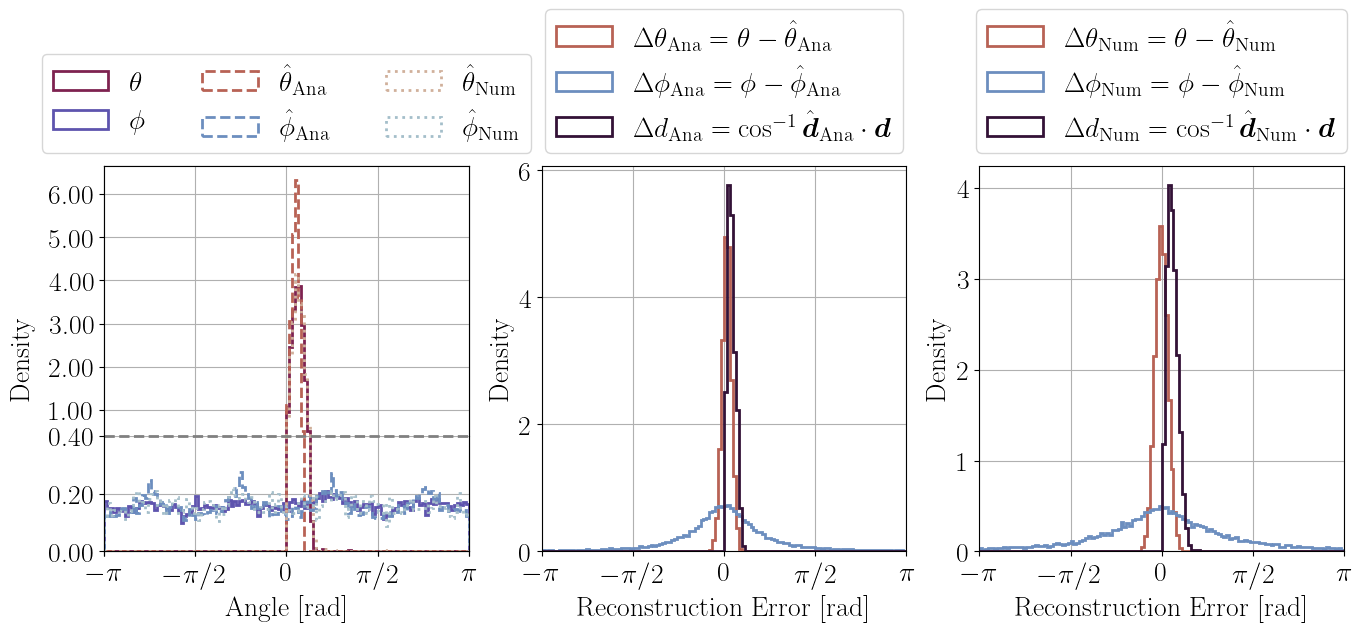

In [27]:
nBins = 125
lw = 2
density = True
abs = False
cumulative = False

bins = np.linspace(-np.pi, np.pi, nBins)
twilight = cm.twilight(np.linspace(0,1,40))

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
gs = ax[0].get_gridspec()
ax[0].remove()
ax_big = fig.add_subplot(gs[0, 0])

# Split plot into two parts
ax_top = ax_big.inset_axes([0, 0.3, 1, 0.7])
ax_bottom = ax_big.inset_axes([0, 0, 1, 0.3])

# ax[0].hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density, color=twilight[25,:])
# ax[0].hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density, color=twilight[12,:])

# ax[0].hist(df_hits['theta'], bins=bins, histtype='step', label=r'$\hat{\theta}_{\text{Ana}}$', lw=lw, density=density, color=twilight[30,:], ls='--')
# ax[0].hist(df_hits['phi'  ], bins=bins, histtype='step', label=r'$\hat{\phi}_{\text{Ana}}$'  , lw=lw, density=density, color=twilight[ 8,:], ls='--')

# ax[0].hist(df_hits['theta_PDF'], bins=bins, histtype='step', label=r'$\hat{\theta}_{\text{PDF}}$', lw=lw, density=density, color=twilight[35,:], ls=':')
# ax[0].hist(df_hits['phi_PDF'  ], bins=bins, histtype='step', label=r'$\hat{\phi}_{\text{PDF}}$'  , lw=lw, density=density, color=twilight[ 4,:], ls=':')

# ax[0].set_xlabel('Angle [rad]')
# ax[0].set_ylabel('Density' if density else 'Counts')
# ax[0].set_xlim(-np.pi, np.pi)
# # [0]ax.set_xlim(0, np.pi/6)
# ax[0].set_xticks(np.linspace(-np.pi, np.pi, 5))
# ax[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax[0].grid()
# ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
# ax[0].set_ylim(0, 0.4)

ax_top.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', lw=lw, label=r'$\theta$' if not abs else r'$\abs{\theta}$', density=density, cumulative=cumulative, color=twilight[25,:])
ax_top.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\phi$'   if not abs else r'$\abs{\phi}$'  , density=density, cumulative=cumulative, color=twilight[12,:])
ax_top.hist(df_hits['theta'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Ana}}$', density=density, cumulative=cumulative, color=twilight[30,:], ls='--')
ax_top.hist(df_hits['phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Ana}}$'  , density=density, cumulative=cumulative, color=twilight[ 8,:], ls='--')
ax_top.hist(df_hits['theta_num'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Num}}$', density=density, cumulative=cumulative, color=twilight[35,:], ls=':')
ax_top.hist(df_hits['phi_num'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Num}}$'  , density=density, cumulative=cumulative, color=twilight[ 4,:], ls=':')

ax_bottom.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', lw=lw, label=r'$\theta$' if not abs else r'$\abs{\theta}$', density=density, cumulative=cumulative, color=twilight[25,:])
ax_bottom.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\phi$'   if not abs else r'$\abs{\phi}$'  , density=density, cumulative=cumulative, color=twilight[12,:])
ax_bottom.hist(df_hits['theta'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Ana}}$', density=density, cumulative=cumulative, color=twilight[30,:], ls='--')
ax_bottom.hist(df_hits['phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Ana}}$'  , density=density, cumulative=cumulative, color=twilight[ 8,:], ls='--')
ax_bottom.hist(df_hits['theta_num'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Num}}$', density=density, cumulative=cumulative, color=twilight[35,:], ls=':')
ax_bottom.hist(df_hits['phi_num'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Num}}$'  , density=density, cumulative=cumulative, color=twilight[ 4,:], ls=':')

ax_top.hlines(0.4, -np.pi, np.pi, lw=2, color='gray', ls='--')
ax_bottom.hlines(0.4, -np.pi, np.pi, lw=2, color='gray', ls='--')

ax_top.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
ax_top.set_ylim(ymin=0.4)
ax_top.set_xlim(-np.pi, np.pi)
ax_top.grid()
ax_top.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_top.set_xticklabels(['' for i in range(5)])
ax_top.tick_params(axis='x', which='both', bottom=False, top=False)
ax_top.spines['bottom'].set_color('none')
ax_top.set_yticks([x for x in np.arange(int(0.4), int(ax_top.get_ylim()[1])+1, 1) if x > 0.4])
ax_top.set_yticklabels([f'{i:.2f}' for i in ax_top.get_yticks()])

ax_bottom.set_xlim(-np.pi, np.pi)
ax_bottom.set_ylim(0, 0.4)
ax_bottom.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_bottom.set_xticklabels(['' for i in range(5)])
ax_bottom.grid()
ax_bottom.spines['top'].set_color('none')
ax_bottom.set_yticks(np.linspace(0, 0.4, 3))
ax_bottom.set_yticklabels([f'{i:.2f}' for i in np.linspace(0, 0.4, 3)])

ax_big.set_xlabel('Angle [rad]')
ax_big.set_ylabel('Density' if density else 'Counts', labelpad=50)
ax_big.set_xlim(-np.pi, np.pi)
ax_big.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_big.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax_big.set_yticks([])

########################################################################################################
########################################################################################################
########################################################################################################


error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

print(error_tot)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

ax[1].hist(error_theta, bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\theta}_\text{Ana}=\abs{\theta-\hat{\theta}_\text{Ana}}$' if abs else r'$\Delta\theta_\text{Ana}=\theta-\hat{\theta}_\text{Ana}$',
        density=density, cumulative=cumulative, color=twilight[30,:])
ax[1].hist(error_phi  , bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\phi}_\text{Ana}=\abs{\phi-\hat{\phi}_\text{Ana}}$' if abs else r'$\Delta\phi_\text{Ana}=\phi-\hat{\phi}_\text{Ana}$',
        density=density, cumulative=cumulative, color=twilight[ 8,:])
ax[1].hist(error_tot  , bins=bins, histtype='step', lw=lw,
           label=r'$\abs{\Delta d}_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$',
           density=density, cumulative=cumulative, color=twilight[20,:])
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[1].set_xlabel('Reconstruction Error [rad]')
ax[1].set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax[1].set_xticks(np.linspace(0, np.pi, 3))
    ax[1].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[1].set_xlim(0, np.pi)
else:
    ax[1].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[1].set_xlim(-np.pi, np.pi)
ax[1].grid()

########################################################################################################
########################################################################################################
########################################################################################################

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta_num']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi_num'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian_num'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

hist_theta = ax[2].hist(error_theta, bins=bins, histtype='step', lw=lw, 
                     label=r'$\abs{\Delta\theta}_\text{Num}=\abs{\theta-\hat{\theta}_\text{Num}}$' if abs else r'$\Delta\theta_\text{Num}=\theta-\hat{\theta}_\text{Num}$',
                     density=density, cumulative=cumulative, color=twilight[30,:])
hist_phi = ax[2].hist(error_phi  , bins=bins, histtype='step', lw=lw, 
                   label=r'$\abs{\Delta\phi}_\text{Num}=\abs{\phi-\hat{\phi}_\text{Num}}$' if abs else r'$\Delta\phi_\text{Num}=\phi-\hat{\phi}_\text{Num}$',
                   density=density, cumulative=cumulative, color=twilight[ 8,:])
hist_tot = ax[2].hist(error_tot  , bins=bins, histtype='step', lw=lw,
                      label=r'$\abs{\Delta d}_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$',
                      density=density, cumulative=cumulative, color=twilight[20,:])
ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[2].set_xlabel('Reconstruction Error [rad]')
ax[2].set_ylabel('Density' if density else 'Counts')
if abs:
    ax[2].set_xticks(np.linspace(0, np.pi, 3))
    ax[2].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[2].set_xlim(0, np.pi)
else:
    ax[2].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[2].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[2].set_xlim(-np.pi, np.pi)
if abs and cumulative:
    sigma_1_ind = np.argmin(np.abs(hist_theta[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_theta[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_theta[0] - 0.99))
    sigma_1 = hist_theta[1][sigma_1_ind]
    sigma_2 = hist_theta[1][sigma_2_ind]
    sigma_3 = hist_theta[1][sigma_3_ind]
    ax[2].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

    sigma_1_ind = np.argmin(np.abs(hist_phi[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_phi[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_phi[0] - 0.99))
    sigma_1 = hist_phi[1][sigma_1_ind]
    sigma_2 = hist_phi[1][sigma_2_ind]
    sigma_3 = hist_phi[1][sigma_3_ind]
    ax[2].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
ax[2].grid()

fig.savefig('../figures/trueIncidentAngleLens1.pdf', bbox_inches='tight')
plt.show()

[0.15935254 0.2408094  0.26787144 ... 0.20331982 0.02121929 0.10271615]


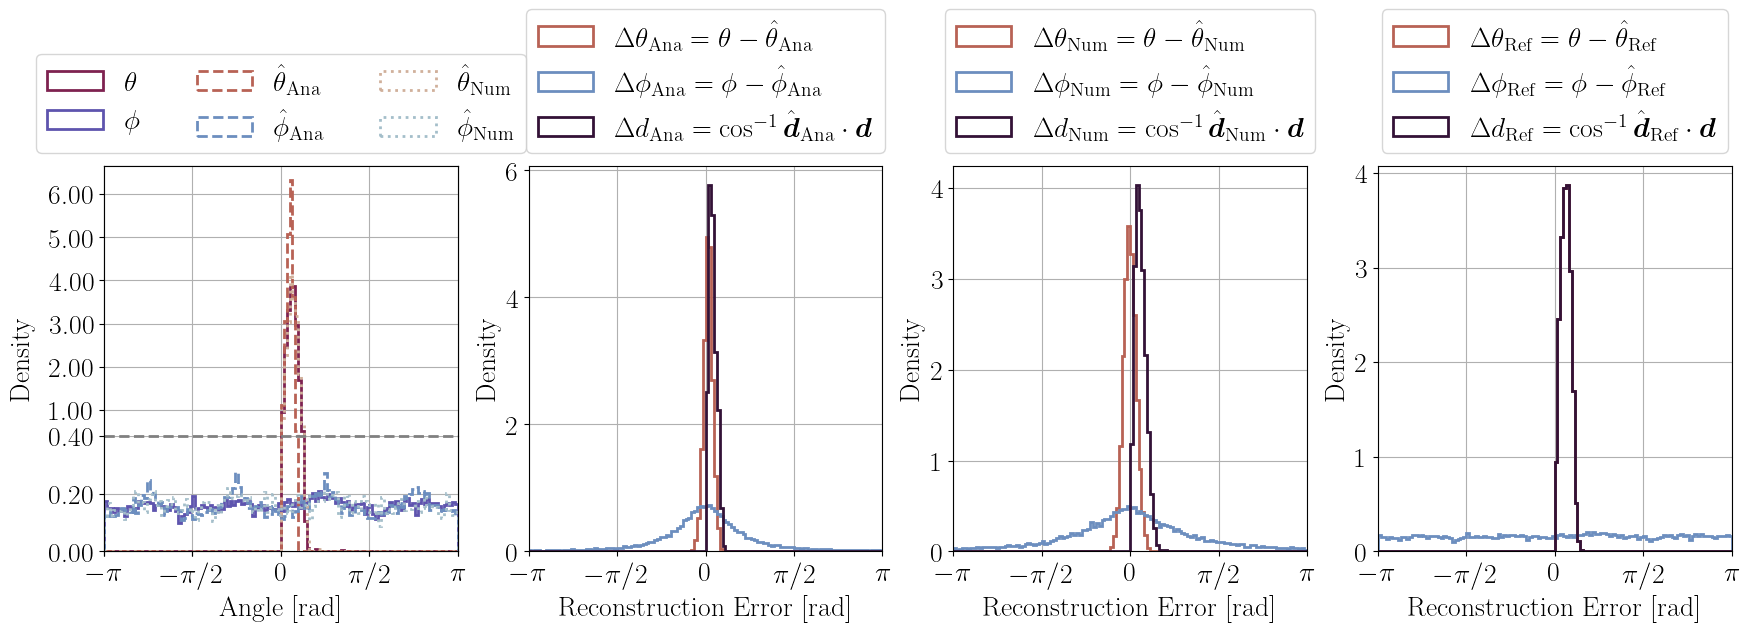

In [28]:
nBins = 125
lw = 2
density = True
abs = False
cumulative = False

bins = np.linspace(-np.pi, np.pi, nBins)
twilight = cm.twilight(np.linspace(0,1,40))

fig, ax = plt.subplots(1, 4, figsize=(21, 5))
gs = ax[0].get_gridspec()
ax[0].remove()
ax_big = fig.add_subplot(gs[0, 0])

# Split plot into two parts
ax_top = ax_big.inset_axes([0, 0.3, 1, 0.7])
ax_bottom = ax_big.inset_axes([0, 0, 1, 0.3])

# ax[0].hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density, color=twilight[25,:])
# ax[0].hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density, color=twilight[12,:])

# ax[0].hist(df_hits['theta'], bins=bins, histtype='step', label=r'$\hat{\theta}_{\text{Ana}}$', lw=lw, density=density, color=twilight[30,:], ls='--')
# ax[0].hist(df_hits['phi'  ], bins=bins, histtype='step', label=r'$\hat{\phi}_{\text{Ana}}$'  , lw=lw, density=density, color=twilight[ 8,:], ls='--')

# ax[0].hist(df_hits['theta_PDF'], bins=bins, histtype='step', label=r'$\hat{\theta}_{\text{PDF}}$', lw=lw, density=density, color=twilight[35,:], ls=':')
# ax[0].hist(df_hits['phi_PDF'  ], bins=bins, histtype='step', label=r'$\hat{\phi}_{\text{PDF}}$'  , lw=lw, density=density, color=twilight[ 4,:], ls=':')

# ax[0].set_xlabel('Angle [rad]')
# ax[0].set_ylabel('Density' if density else 'Counts')
# ax[0].set_xlim(-np.pi, np.pi)
# # [0]ax.set_xlim(0, np.pi/6)
# ax[0].set_xticks(np.linspace(-np.pi, np.pi, 5))
# ax[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax[0].grid()
# ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
# ax[0].set_ylim(0, 0.4)

ax_top.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', lw=lw, label=r'$\theta$' if not abs else r'$\abs{\theta}$', density=density, cumulative=cumulative, color=twilight[25,:])
ax_top.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\phi$'   if not abs else r'$\abs{\phi}$'  , density=density, cumulative=cumulative, color=twilight[12,:])
ax_top.hist(df_hits['theta'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Ana}}$', density=density, cumulative=cumulative, color=twilight[30,:], ls='--')
ax_top.hist(df_hits['phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Ana}}$'  , density=density, cumulative=cumulative, color=twilight[ 8,:], ls='--')
ax_top.hist(df_hits['theta_num'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Num}}$', density=density, cumulative=cumulative, color=twilight[35,:], ls=':')
ax_top.hist(df_hits['phi_num'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Num}}$'  , density=density, cumulative=cumulative, color=twilight[ 4,:], ls=':')

ax_bottom.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', lw=lw, label=r'$\theta$' if not abs else r'$\abs{\theta}$', density=density, cumulative=cumulative, color=twilight[25,:])
ax_bottom.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\phi$'   if not abs else r'$\abs{\phi}$'  , density=density, cumulative=cumulative, color=twilight[12,:])
ax_bottom.hist(df_hits['theta'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Ana}}$', density=density, cumulative=cumulative, color=twilight[30,:], ls='--')
ax_bottom.hist(df_hits['phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Ana}}$'  , density=density, cumulative=cumulative, color=twilight[ 8,:], ls='--')
ax_bottom.hist(df_hits['theta_num'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Num}}$', density=density, cumulative=cumulative, color=twilight[35,:], ls=':')
ax_bottom.hist(df_hits['phi_num'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Num}}$'  , density=density, cumulative=cumulative, color=twilight[ 4,:], ls=':')

ax_top.hlines(0.4, -np.pi, np.pi, lw=2, color='gray', ls='--')
ax_bottom.hlines(0.4, -np.pi, np.pi, lw=2, color='gray', ls='--')

ax_top.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
ax_top.set_ylim(ymin=0.4)
ax_top.set_xlim(-np.pi, np.pi)
ax_top.grid()
ax_top.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_top.set_xticklabels(['' for i in range(5)])
ax_top.tick_params(axis='x', which='both', bottom=False, top=False)
ax_top.spines['bottom'].set_color('none')
ax_top.set_yticks([x for x in np.arange(int(0.4), int(ax_top.get_ylim()[1])+1, 1) if x > 0.4])
ax_top.set_yticklabels([f'{i:.2f}' for i in ax_top.get_yticks()])

ax_bottom.set_xlim(-np.pi, np.pi)
ax_bottom.set_ylim(0, 0.4)
ax_bottom.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_bottom.set_xticklabels(['' for i in range(5)])
ax_bottom.grid()
ax_bottom.spines['top'].set_color('none')
ax_bottom.set_yticks(np.linspace(0, 0.4, 3))
ax_bottom.set_yticklabels([f'{i:.2f}' for i in np.linspace(0, 0.4, 3)])

ax_big.set_xlabel('Angle [rad]')
ax_big.set_ylabel('Density' if density else 'Counts', labelpad=50)
ax_big.set_xlim(-np.pi, np.pi)
ax_big.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_big.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax_big.set_yticks([])

########################################################################################################
########################################################################################################
########################################################################################################


error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

print(error_tot)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

ax[1].hist(error_theta, bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\theta}_\text{Ana}=\abs{\theta-\hat{\theta}_\text{Ana}}$' if abs else r'$\Delta\theta_\text{Ana}=\theta-\hat{\theta}_\text{Ana}$',
        density=density, cumulative=cumulative, color=twilight[30,:])
ax[1].hist(error_phi  , bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\phi}_\text{Ana}=\abs{\phi-\hat{\phi}_\text{Ana}}$' if abs else r'$\Delta\phi_\text{Ana}=\phi-\hat{\phi}_\text{Ana}$',
        density=density, cumulative=cumulative, color=twilight[ 8,:])
ax[1].hist(error_tot  , bins=bins, histtype='step', lw=lw,
           label=r'$\abs{\Delta d}_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$',
           density=density, cumulative=cumulative, color=twilight[20,:])
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[1].set_xlabel('Reconstruction Error [rad]')
ax[1].set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax[1].set_xticks(np.linspace(0, np.pi, 3))
    ax[1].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[1].set_xlim(0, np.pi)
else:
    ax[1].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[1].set_xlim(-np.pi, np.pi)
ax[1].grid()

########################################################################################################
########################################################################################################
########################################################################################################

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta_num']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi_num'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian_num'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

hist_theta = ax[2].hist(error_theta, bins=bins, histtype='step', lw=lw, 
                     label=r'$\abs{\Delta\theta}_\text{Num}=\abs{\theta-\hat{\theta}_\text{Num}}$' if abs else r'$\Delta\theta_\text{Num}=\theta-\hat{\theta}_\text{Num}$',
                     density=density, cumulative=cumulative, color=twilight[30,:])
hist_phi = ax[2].hist(error_phi  , bins=bins, histtype='step', lw=lw, 
                   label=r'$\abs{\Delta\phi}_\text{Num}=\abs{\phi-\hat{\phi}_\text{Num}}$' if abs else r'$\Delta\phi_\text{Num}=\phi-\hat{\phi}_\text{Num}$',
                   density=density, cumulative=cumulative, color=twilight[ 8,:])
hist_tot = ax[2].hist(error_tot  , bins=bins, histtype='step', lw=lw,
                      label=r'$\abs{\Delta d}_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$',
                      density=density, cumulative=cumulative, color=twilight[20,:])
ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[2].set_xlabel('Reconstruction Error [rad]')
ax[2].set_ylabel('Density' if density else 'Counts')
if abs:
    ax[2].set_xticks(np.linspace(0, np.pi, 3))
    ax[2].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[2].set_xlim(0, np.pi)
else:
    ax[2].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[2].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[2].set_xlim(-np.pi, np.pi)
if abs and cumulative:
    sigma_1_ind = np.argmin(np.abs(hist_theta[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_theta[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_theta[0] - 0.99))
    sigma_1 = hist_theta[1][sigma_1_ind]
    sigma_2 = hist_theta[1][sigma_2_ind]
    sigma_3 = hist_theta[1][sigma_3_ind]
    ax[2].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

    sigma_1_ind = np.argmin(np.abs(hist_phi[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_phi[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_phi[0] - 0.99))
    sigma_1 = hist_phi[1][sigma_1_ind]
    sigma_2 = hist_phi[1][sigma_2_ind]
    sigma_3 = hist_phi[1][sigma_3_ind]
    ax[2].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
ax[2].grid()

########################################################################################################
########################################################################################################
########################################################################################################

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta_ref']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi_ref'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian_ref'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

hist_theta = ax[3].hist(error_theta, bins=bins, histtype='step', lw=lw,
                        label=r'$\abs{\Delta\theta}_\text{Ref}=\abs{\theta-\hat{\theta}_\text{Ref}}$' if abs else r'$\Delta\theta_\text{Ref}=\theta-\hat{\theta}_\text{Ref}$',
                        density=density, cumulative=cumulative, color=twilight[30,:])
hist_phi = ax[3].hist(error_phi  , bins=bins, histtype='step', lw=lw,
                        label=r'$\abs{\Delta\phi}_\text{Ref}=\abs{\phi-\hat{\phi}_\text{Ref}}$' if abs else r'$\Delta\phi_\text{Ref}=\phi-\hat{\phi}_\text{Ref}$',
                        density=density, cumulative=cumulative, color=twilight[ 8,:])
hist_tot = ax[3].hist(error_tot  , bins=bins, histtype='step', lw=lw,
                        label=r'$\abs{\Delta d}_\text{Ref}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ref}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Ref}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ref}}\cdot \boldsymbol{d}$',
                        density=density, cumulative=cumulative, color=twilight[20,:])
ax[3].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[3].set_xlabel('Reconstruction Error [rad]')
ax[3].set_ylabel('Density' if density else 'Counts')
if abs:
    ax[3].set_xticks(np.linspace(0, np.pi, 3))
    ax[3].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[3].set_xlim(0, np.pi)
else:
    ax[3].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[3].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[3].set_xlim(-np.pi, np.pi)
if abs and cumulative:
    sigma_1_ind = np.argmin(np.abs(hist_theta[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_theta[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_theta[0] - 0.99))
    sigma_1 = hist_theta[1][sigma_1_ind]
    sigma_2 = hist_theta[1][sigma_2_ind]
    sigma_3 = hist_theta[1][sigma_3_ind]
    ax[3].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[3].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[3].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

    sigma_1_ind = np.argmin(np.abs(hist_phi[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_phi[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_phi[0] - 0.99))
    sigma_1 = hist_phi[1][sigma_1_ind]
    sigma_2 = hist_phi[1][sigma_2_ind]
    sigma_3 = hist_phi[1][sigma_3_ind]
    ax[3].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[3].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[3].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
ax[3].grid()

########################################################################################################
########################################################################################################
########################################################################################################

fig.savefig('../figures/trueIncidentAngleLens_withRef.pdf', bbox_inches='tight')
plt.show()

======= ANA =======
Sigma 1: 0.14279966607226333 8.181818181818182
Sigma 2: 0.23799944345377222 13.636363636363637
Sigma 3: 0.28559933214452665 16.363636363636363
RMS Ana: 0.14508510882637973 8.312764405947807

======= NUM =======
Sigma 1: 0.214199499108395 12.272727272727275
Sigma 2: 0.3490658503988659 20.0
Sigma 3: 0.42839899821679 24.54545454545455
RMS Num: 0.2137640227318638 12.247776314274384


/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1725497929.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot([0, x_ana[sigma_1_ind_ana], x_ana[sigma_1_ind_ana]], [0.68, 0.68, 0], 'r--', color=cs1[0], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1725497929.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot([0, x_ana[sigma_2_ind_ana], x_ana[sigma_2_ind_ana]], [0.95, 0.95, 0], 'r--', color=cs1[0], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_36924/1725497929.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--

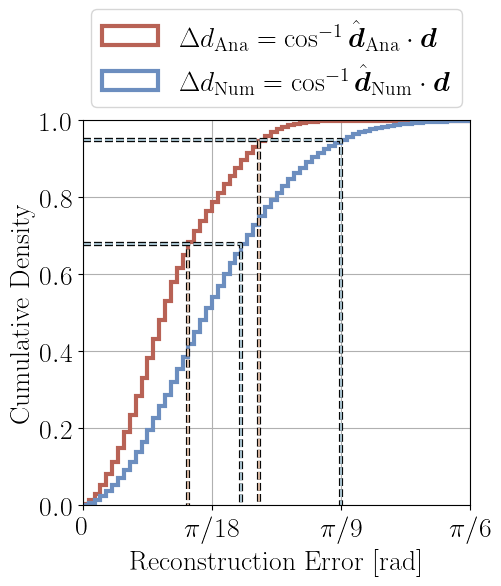

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

xlim = [0, np.pi/6]
nBins = 100
cs = [twilight[30,:], twilight[8,:]]
cs1 = [twilight[35,:], twilight[4,:]]
lw = 3

bins = np.linspace(0, np.pi/4, nBins)

error_ana = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)
error_num = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian_num'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

bins_ana, x_ana, _ = ax.hist(error_ana, bins=bins, histtype='step', lw=lw,
        label=r'$\abs{\Delta d}_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$',
        density=density, cumulative=True, color=cs[0], range=[xlim[0], xlim[1]+0.1])
bins_num, x_num, _ = ax.hist(error_num, bins=bins, histtype='step', lw=lw,
        label=r'$\abs{\Delta d}_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$',
        density=density, cumulative=True, color=cs[1], range=[xlim[0], xlim[1]+0.1])

sigma_1_ind_ana = np.argmin(np.abs(bins_ana - 0.68))
sigma_2_ind_ana = np.argmin(np.abs(bins_ana - 0.95))
sigma_3_ind_ana = np.argmin(np.abs(bins_ana - 0.99))

print('======= ANA =======')
print('Sigma 1:', x_ana[sigma_1_ind_ana], x_num[sigma_1_ind_ana]*180/np.pi)
print('Sigma 2:', x_ana[sigma_2_ind_ana], x_num[sigma_2_ind_ana]*180/np.pi)
print('Sigma 3:', x_ana[sigma_3_ind_ana], x_num[sigma_3_ind_ana]*180/np.pi)
print('RMS Ana:', np.sqrt(np.mean(np.power(error_ana[~np.isnan(error_ana)], 2))), np.sqrt(np.mean(np.power(error_ana[~np.isnan(error_ana)]*180/np.pi, 2))))

print()

sigma_1_ind_num = np.argmin(np.abs(bins_num - 0.68))
sigma_2_ind_num = np.argmin(np.abs(bins_num - 0.95))
sigma_3_ind_num = np.argmin(np.abs(bins_num - 0.99))

print('======= NUM =======')
print('Sigma 1:', x_num[sigma_1_ind_num], x_num[sigma_1_ind_num]*180/np.pi)
print('Sigma 2:', x_num[sigma_2_ind_num], x_num[sigma_2_ind_num]*180/np.pi)
print('Sigma 3:', x_num[sigma_3_ind_num], x_num[sigma_3_ind_num]*180/np.pi)
print('RMS Num:', np.sqrt(np.mean(np.power(error_num[~np.isnan(error_num)], 2))), np.sqrt(np.mean(np.power(error_num[~np.isnan(error_num)]*180/np.pi, 2))))

ax.plot([0, x_ana[sigma_1_ind_ana], x_ana[sigma_1_ind_ana]], [0.68, 0.68, 0], 'r--', color=cs1[0], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
ax.plot([0, x_ana[sigma_2_ind_ana], x_ana[sigma_2_ind_ana]], [0.95, 0.95, 0], 'r--', color=cs1[0], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
# ax.plot([0, x_ana[sigma_3_ind_ana], x_ana[sigma_3_ind_ana]], [0.99, 0.99, 0], 'r--', lw=lw, color=cs[0], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

ax.plot([0, x_num[sigma_1_ind_num], x_num[sigma_1_ind_num]], [0.68, 0.68, 0], 'b--', color=cs1[1], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
ax.plot([0, x_num[sigma_2_ind_num], x_num[sigma_2_ind_num]], [0.95, 0.95, 0], 'b--', color=cs1[1], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
# ax.plot([0, x_num[sigma_3_ind_num], x_num[sigma_3_ind_num]], [0.99, 0.99, 0], 'b--', lw=lw, color=cs[1], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax.set_xlabel('Reconstruction Error [rad]')
ax.set_ylabel('Cumulative Density' if density else 'Counts')
ax.set_xlim(xlim)
ax.set_ylim(0, 1)
# ax.set_xticks(np.linspace(0, np.pi/4, 5))
# ax.set_xticklabels([r'$0$', r'$\pi/16$', r'$\pi/8$', r'$3\pi/16$', r'$\pi/4$'])
ax.set_xticks(np.linspace(0, np.pi/6, 4))
ax.set_xticklabels([r'$0$', r'$\pi/18$', r'$\pi/9$', r'$\pi/6$'])
# ax.set_yscale('log')
ax.grid()

fig.savefig('../figures/direction_error.pdf', bbox_inches='tight')
plt.show()

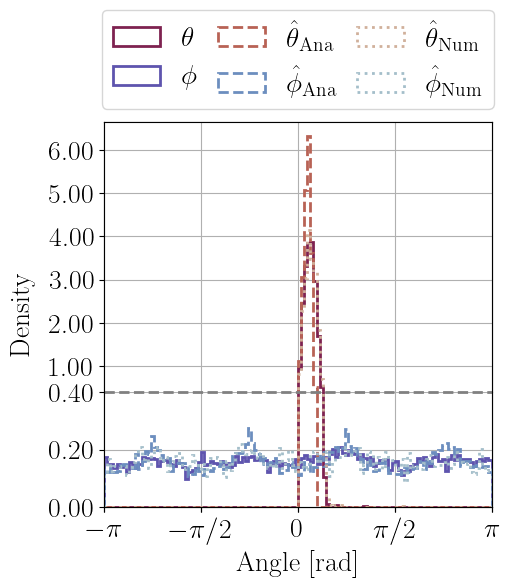

In [30]:
nBins = 125
lw = 2
density = True
abs = False
cumulative = False

bins = np.linspace(-np.pi, np.pi, nBins)
twilight = cm.twilight(np.linspace(0,1,40))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = [ax]
gs = ax[0].get_gridspec()
ax[0].remove()
ax_big = fig.add_subplot(gs[0, 0])

# Split plot into two parts
ax_top = ax_big.inset_axes([0, 0.3, 1, 0.7])
ax_bottom = ax_big.inset_axes([0, 0, 1, 0.3])

# ax[0].hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw, density=density, color=twilight[25,:])
# ax[0].hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw, density=density, color=twilight[12,:])

# ax[0].hist(df_hits['theta'], bins=bins, histtype='step', label=r'$\hat{\theta}_{\text{Ana}}$', lw=lw, density=density, color=twilight[30,:], ls='--')
# ax[0].hist(df_hits['phi'  ], bins=bins, histtype='step', label=r'$\hat{\phi}_{\text{Ana}}$'  , lw=lw, density=density, color=twilight[ 8,:], ls='--')

# ax[0].hist(df_hits['theta_PDF'], bins=bins, histtype='step', label=r'$\hat{\theta}_{\text{PDF}}$', lw=lw, density=density, color=twilight[35,:], ls=':')
# ax[0].hist(df_hits['phi_PDF'  ], bins=bins, histtype='step', label=r'$\hat{\phi}_{\text{PDF}}$'  , lw=lw, density=density, color=twilight[ 4,:], ls=':')

# ax[0].set_xlabel('Angle [rad]')
# ax[0].set_ylabel('Density' if density else 'Counts')
# ax[0].set_xlim(-np.pi, np.pi)
# # [0]ax.set_xlim(0, np.pi/6)
# ax[0].set_xticks(np.linspace(-np.pi, np.pi, 5))
# ax[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax[0].grid()
# ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
# ax[0].set_ylim(0, 0.4)

ax_top.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', lw=lw, label=r'$\theta$' if not abs else r'$\abs{\theta}$', density=density, cumulative=cumulative, color=twilight[25,:])
ax_top.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\phi$'   if not abs else r'$\abs{\phi}$'  , density=density, cumulative=cumulative, color=twilight[12,:])
ax_top.hist(df_hits['theta'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Ana}}$', density=density, cumulative=cumulative, color=twilight[30,:], ls='--')
ax_top.hist(df_hits['phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Ana}}$'  , density=density, cumulative=cumulative, color=twilight[ 8,:], ls='--')
ax_top.hist(df_hits['theta_num'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Num}}$', density=density, cumulative=cumulative, color=twilight[35,:], ls=':')
ax_top.hist(df_hits['phi_num'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Num}}$'  , density=density, cumulative=cumulative, color=twilight[ 4,:], ls=':')

ax_bottom.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', lw=lw, label=r'$\theta$' if not abs else r'$\abs{\theta}$', density=density, cumulative=cumulative, color=twilight[25,:])
ax_bottom.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\phi$'   if not abs else r'$\abs{\phi}$'  , density=density, cumulative=cumulative, color=twilight[12,:])
ax_bottom.hist(df_hits['theta'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Ana}}$', density=density, cumulative=cumulative, color=twilight[30,:], ls='--')
ax_bottom.hist(df_hits['phi'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Ana}}$'  , density=density, cumulative=cumulative, color=twilight[ 8,:], ls='--')
ax_bottom.hist(df_hits['theta_num'], bins=bins, histtype='step', lw=lw, label=r'$\hat{\theta}_{\text{Num}}$', density=density, cumulative=cumulative, color=twilight[35,:], ls=':')
ax_bottom.hist(df_hits['phi_num'  ], bins=bins, histtype='step', lw=lw, label=r'$\hat{\phi}_{\text{Num}}$'  , density=density, cumulative=cumulative, color=twilight[ 4,:], ls=':')

ax_top.hlines(0.4, -np.pi, np.pi, lw=2, color='gray', ls='--')
ax_bottom.hlines(0.4, -np.pi, np.pi, lw=2, color='gray', ls='--')

ax_top.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, columnspacing=0.7, handlelength=1.7)
ax_top.set_ylim(ymin=0.4)
ax_top.set_xlim(-np.pi, np.pi)
ax_top.grid()
ax_top.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_top.set_xticklabels(['' for i in range(5)])
ax_top.tick_params(axis='x', which='both', bottom=False, top=False)
ax_top.spines['bottom'].set_color('none')
ax_top.set_yticks([x for x in np.arange(int(0.4), int(ax_top.get_ylim()[1])+1, 1) if x > 0.4])
ax_top.set_yticklabels([f'{i:.2f}' for i in ax_top.get_yticks()])

ax_bottom.set_xlim(-np.pi, np.pi)
ax_bottom.set_ylim(0, 0.4)
ax_bottom.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_bottom.set_xticklabels(['' for i in range(5)])
ax_bottom.grid()
ax_bottom.spines['top'].set_color('none')
ax_bottom.set_yticks(np.linspace(0, 0.4, 3))
ax_bottom.set_yticklabels([f'{i:.2f}' for i in np.linspace(0, 0.4, 3)])

ax_big.set_xlabel('Angle [rad]')
ax_big.set_ylabel('Density' if density else 'Counts', labelpad=50)
ax_big.set_xlim(-np.pi, np.pi)
ax_big.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax_big.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax_big.set_yticks([])

fig.savefig('../figures/trueIncidentAngleLens_all.pdf', bbox_inches='tight')
plt.show()

[0.15935254 0.2408094  0.26787144 ... 0.20331982 0.02121929 0.10271615]


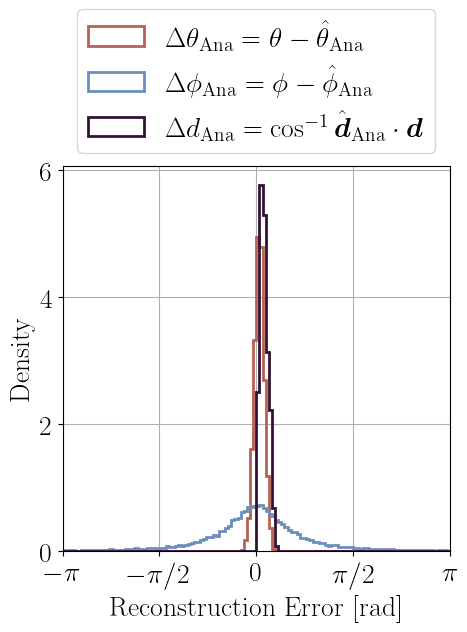

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = [_,ax]

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

print(error_tot)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

ax[1].hist(error_theta, bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\theta}_\text{Ana}=\abs{\theta-\hat{\theta}_\text{Ana}}$' if abs else r'$\Delta\theta_\text{Ana}=\theta-\hat{\theta}_\text{Ana}$',
        density=density, cumulative=cumulative, color=twilight[30,:])
ax[1].hist(error_phi  , bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\phi}_\text{Ana}=\abs{\phi-\hat{\phi}_\text{Ana}}$' if abs else r'$\Delta\phi_\text{Ana}=\phi-\hat{\phi}_\text{Ana}$',
        density=density, cumulative=cumulative, color=twilight[ 8,:])
ax[1].hist(error_tot  , bins=bins, histtype='step', lw=lw,
           label=r'$\abs{\Delta d}_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Ana}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Ana}}\cdot \boldsymbol{d}$',
           density=density, cumulative=cumulative, color=twilight[20,:])
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[1].set_xlabel('Reconstruction Error [rad]')
ax[1].set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax[1].set_xticks(np.linspace(0, np.pi, 3))
    ax[1].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[1].set_xlim(0, np.pi)
else:
    ax[1].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[1].set_xlim(-np.pi, np.pi)
ax[1].grid()

fig.savefig('../figures/trueIncidentAngleLens_ana.pdf', bbox_inches='tight')
plt.show()

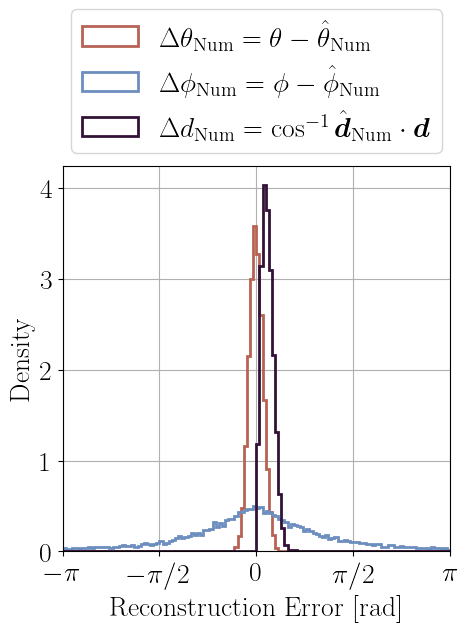

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = [_,_,ax]

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta_num']
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['phi_num'  ]
error_tot   = angle_between_vectors(
    np.array(df_hits['direction_reco_cartesian_num'].to_list()),
    np.array(df_hits['direction_true_cartesian'].to_list())
)

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

hist_theta = ax[2].hist(error_theta, bins=bins, histtype='step', lw=lw, 
                     label=r'$\abs{\Delta\theta}_\text{Num}=\abs{\theta-\hat{\theta}_\text{Num}}$' if abs else r'$\Delta\theta_\text{Num}=\theta-\hat{\theta}_\text{Num}$',
                     density=density, cumulative=cumulative, color=twilight[30,:])
hist_phi = ax[2].hist(error_phi  , bins=bins, histtype='step', lw=lw, 
                   label=r'$\abs{\Delta\phi}_\text{Num}=\abs{\phi-\hat{\phi}_\text{Num}}$' if abs else r'$\Delta\phi_\text{Num}=\phi-\hat{\phi}_\text{Num}$',
                   density=density, cumulative=cumulative, color=twilight[ 8,:])
hist_tot = ax[2].hist(error_tot  , bins=bins, histtype='step', lw=lw,
                      label=r'$\abs{\Delta d}_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$' if abs else r'$\Delta d_\text{Num}=\cos^{-1}\hat{\boldsymbol{d}}_{\text{Num}}\cdot \boldsymbol{d}$',
                      density=density, cumulative=cumulative, color=twilight[20,:])
ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax[2].set_xlabel('Reconstruction Error [rad]')
ax[2].set_ylabel('Density' if density else 'Counts')
if abs:
    ax[2].set_xticks(np.linspace(0, np.pi, 3))
    ax[2].set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[2].set_xlim(0, np.pi)
else:
    ax[2].set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax[2].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax[2].set_xlim(-np.pi, np.pi)
if abs and cumulative:
    sigma_1_ind = np.argmin(np.abs(hist_theta[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_theta[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_theta[0] - 0.99))
    sigma_1 = hist_theta[1][sigma_1_ind]
    sigma_2 = hist_theta[1][sigma_2_ind]
    sigma_3 = hist_theta[1][sigma_3_ind]
    ax[2].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'r--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

    sigma_1_ind = np.argmin(np.abs(hist_phi[0] - 0.68))
    sigma_2_ind = np.argmin(np.abs(hist_phi[0] - 0.95))
    sigma_3_ind = np.argmin(np.abs(hist_phi[0] - 0.99))
    sigma_1 = hist_phi[1][sigma_1_ind]
    sigma_2 = hist_phi[1][sigma_2_ind]
    sigma_3 = hist_phi[1][sigma_3_ind]
    ax[2].plot([0, sigma_1, sigma_1], [0.68, 0.68, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_2, sigma_2], [0.95, 0.95, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    ax[2].plot([0, sigma_3, sigma_3], [0.99, 0.99, 0], 'b--', lw=lw, color=twilight[30,:], path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
ax[2].grid()

fig.savefig('../figures/trueIncidentAngleLens_num.pdf', bbox_inches='tight')
plt.show()